### 데이터 준비

In [5]:
import pandas as pd
data = pd.read_csv("../../데이터/재무제표_분석용데이터_수정.csv", encoding="euc-kr")
data.drop(['ROA', 'ROE', '배당금', 'PER'], axis = 1, inplace = True)
data['수익률'] = (data['미래_주가'] - data['현재_주가']) / data['현재_주가'] * 100
data.dropna(inplace = True)

### 환경 설정

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
sns.set()
%matplotlib inline
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

### 수익률과의 상관관계 확인

#### 부채비율

(-100.0, 100.0)

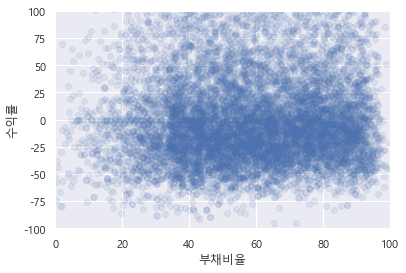

In [8]:
plt.scatter(data['부채비율'], data['수익률'], alpha = 0.1)
plt.xlabel("부채비율")
plt.ylabel("수익률")
plt.xlim(0, 100)
plt.ylim(-100, 100)

In [9]:
display(data.corr().round(4))

,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,현재_주가,미래_주가,수익률
연도,1.0000,0.0078,-0.0085,0.0029,0.0057,-0.0364,-0.0135,0.1770
부채비율,0.0078,1.0000,0.0060,0.0040,-0.0026,0.0459,0.0479,-0.0128
매출액증가율,-0.0085,0.0060,1.0000,0.2653,0.3281,0.0041,0.0048,0.0096
영업이익증가율,0.0029,0.0040,0.2653,1.0000,0.0853,-0.0011,-0.0011,-0.0009
당기순이익증가율,0.0057,-0.0026,0.3281,0.0853,1.0000,0.0030,0.0050,0.0092
현재_주가,-0.0364,0.0459,0.0041,-0.0011,0.0030,1.0000,0.9184,-0.0632
미래_주가,-0.0135,0.0479,0.0048,-0.0011,0.0050,0.9184,1.0000,0.0539
수익률,0.1770,-0.0128,0.0096,-0.0009,0.0092,-0.0632,0.0539,1.0000


#### 매출액 증가율

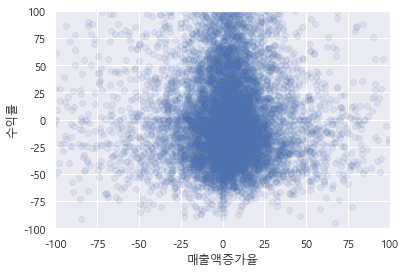

0.0095


In [11]:
temp = data.loc[data['매출액_상태'] == "흑자지속", ['매출액증가율', '수익률']]
plt.scatter(temp['매출액증가율'], temp['수익률'], alpha = 0.1)
plt.xlabel("매출액증가율")
plt.ylabel("수익률")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()
print(temp.corr().loc['매출액증가율', '수익률'].round(4))

#### 영업이익 증가율

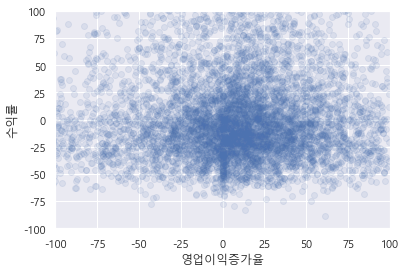

0.003


In [12]:
temp = data.loc[data['영업이익_상태'] == "흑자지속", ['영업이익증가율', '수익률']]
plt.scatter(temp['영업이익증가율'], temp['수익률'], alpha = 0.1)
plt.xlabel("영업이익증가율")
plt.ylabel("수익률")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()
print(temp.corr().loc['영업이익증가율', '수익률'].round(4))

#### 당기순이익 증가율

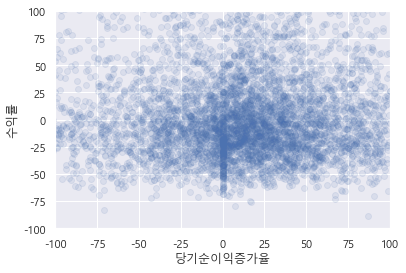

-0.0014


In [13]:
temp = data.loc[data['당기순이익_상태'] == "흑자지속", ['당기순이익증가율', '수익률']]
plt.scatter(temp['당기순이익증가율'], temp['수익률'], alpha = 0.1)
plt.xlabel("당기순이익증가율")
plt.ylabel("수익률")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()
print(temp.corr().loc['당기순이익증가율', '수익률'].round(4))

### 동일 가중 교체 매매에 따른 수익 비교

#### qcut 함수

In [14]:
group = pd.qcut(data['부채비율'], 10)
display(group.value_counts(normalize = True).sort_index())

(-532.207, 30.518]    0.100046
(30.518, 38.92]       0.099954
(38.92, 45.538]       0.100046
(45.538, 52.019]      0.099954
(52.019, 58.248]      0.100046
(58.248, 64.729]      0.099954
(64.729, 71.909]      0.099954
(71.909, 78.707]      0.100046
(78.707, 86.35]       0.099954
(86.35, 99.9]         0.100046
Name: 부채비율, dtype: float64

In [15]:
group = pd.qcut(data['부채비율'], 10, labels = range(1, 11)).astype(int)
display(group.head(10))

1     6
2     5
3     6
4     5
5     6
6     6
9     1
10    1
11    1
12    1
Name: 부채비율, dtype: int32

#### 부채 비율

In [16]:
result = []
for year in range(2014, 2020):
    temp = data.loc[(data['연도'] == year), ['부채비율', '수익률']]
    group_list = pd.qcut(temp['부채비율'], 10, labels = range(1, 11)).astype(int)
    for group in range(1, 11):
        ror_list = temp.loc[group_list == group, '수익률']
        inve_per_stock = 10**8 / len(ror_list)
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, group, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "그룹", "수익률"]) 

Text(0.5, 0, '연도')

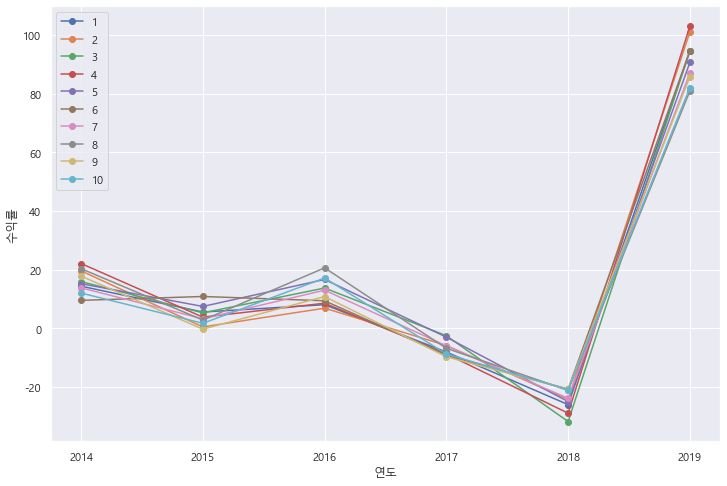

In [17]:
plt.figure(figsize = (12, 8))
for group in range(1, 11):
    graph_data = result.loc[(result['그룹'] == group), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = group)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [18]:
display(result.groupby('그룹')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
1,6.0,14.75,41.66,-25.99,-4.66,6.83,12.81,94.54
2,6.0,16.34,43.97,-24.19,-4.26,3.70,16.42,101.07
3,6.0,15.89,42.25,-31.77,-0.55,9.52,15.41,94.63
4,6.0,16.66,45.71,-28.93,-5.58,6.21,18.73,103.06
5,6.0,17.02,39.20,-24.96,-0.38,11.36,16.32,90.68
6,6.0,15.77,40.67,-20.73,-4.48,9.48,10.54,94.61
7,6.0,14.57,38.19,-23.83,-3.66,8.15,13.61,87.12
8,6.0,16.13,35.57,-21.16,-4.39,11.59,20.57,80.90
9,6.0,13.97,37.82,-20.72,-7.33,5.29,16.08,85.82


#### 매출액 증가율

In [19]:
result = []
for year in range(2014, 2020):
    temp = data.loc[(data['연도'] == year) & (data['매출액_상태'] == "흑자지속"),
                    ['매출액증가율', '수익률']]
    group_list = pd.qcut(temp['매출액증가율'], 10, labels = range(1, 11)).astype(int)
    for group in range(1, 11):
        ror_list = temp.loc[group_list == group, '수익률']
        inve_per_stock = 10**8 / len(ror_list)
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, group, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "그룹", "수익률"]) 

Text(0.5, 0, '연도')

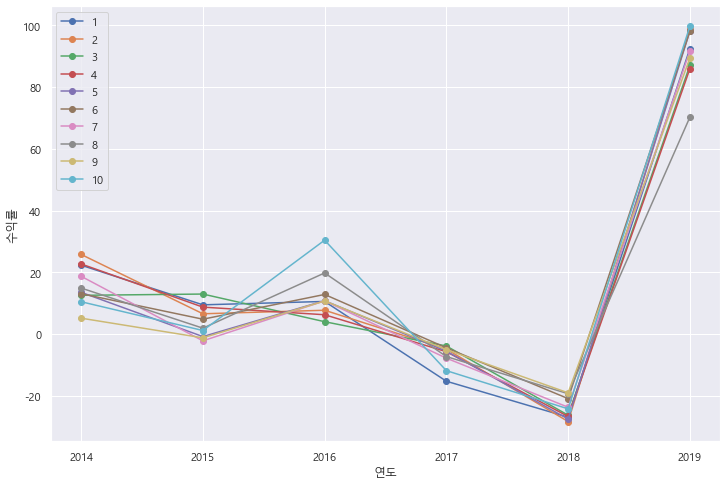

In [20]:
plt.figure(figsize = (12, 8))
for group in range(1, 11):
    graph_data = result.loc[(result['그룹'] == group), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = group)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [21]:
display(result.groupby('그룹')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
1,6.0,15.47,41.86,-26.86,-9.04,10.06,19.41,92.42
2,6.0,17.66,43.57,-28.27,-1.96,7.18,21.30,98.85
3,6.0,14.43,38.37,-26.21,-1.85,8.32,12.89,86.99
4,6.0,15.23,38.37,-26.63,-2.68,7.53,19.24,85.90
5,6.0,14.79,43.34,-27.47,-4.32,5.04,12.88,98.06
6,6.0,17.27,41.57,-20.85,-2.10,8.86,13.05,98.05
7,6.0,14.61,40.53,-23.64,-6.35,4.33,16.76,91.68
8,6.0,13.41,31.30,-19.26,-4.94,8.45,18.61,70.23
9,6.0,13.36,38.59,-18.97,-4.04,2.00,9.37,89.37


#### 영업이익 증가율

In [22]:
result = []
for year in range(2014, 2020):
    temp = data.loc[(data['연도'] == year) & (data['영업이익_상태'] == "흑자지속"),
                    ['영업이익증가율', '수익률']]
    group_list = pd.qcut(temp['영업이익증가율'], 10, labels = range(1, 11)).astype(int)
    for group in range(1, 11):
        ror_list = temp.loc[group_list == group, '수익률']
        inve_per_stock = 10**8 / len(ror_list)
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, group, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "그룹", "수익률"]) 

Text(0.5, 0, '연도')

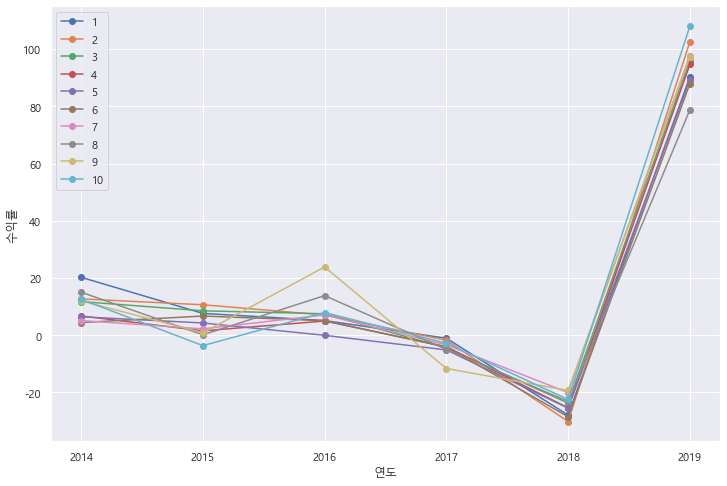

In [23]:
plt.figure(figsize = (12, 8))
for group in range(1, 11):
    graph_data = result.loc[(result['그룹'] == group), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = group)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [24]:
display(result.groupby('그룹')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
1,6.0,15.72,39.86,-27.91,0.50,6.38,17.09,90.28
2,6.0,16.85,44.85,-30.16,0.46,8.86,12.19,102.58
3,6.0,15.94,41.32,-23.70,-1.45,8.02,10.95,95.99
4,6.0,13.08,41.62,-25.39,-2.62,3.25,6.29,94.62
5,6.0,11.56,39.75,-25.48,-3.86,2.13,5.91,89.26
6,6.0,11.92,39.49,-28.51,-1.99,4.75,6.30,87.92
7,6.0,14.79,41.79,-20.04,-1.98,3.68,6.60,97.72
8,6.0,13.29,34.98,-23.11,-3.67,7.00,14.73,78.75
9,6.0,17.17,42.21,-19.31,-8.51,6.44,20.90,97.23


#### 당기순이익 증가율

In [25]:
result = []
for year in range(2014, 2020):
    temp = data.loc[(data['연도'] == year) & (data['당기순이익_상태'] == "흑자지속"),
                    ['당기순이익증가율', '수익률']]
    group_list = pd.qcut(temp['당기순이익증가율'], 10, labels = range(1, 11)).astype(int)
    for group in range(1, 11):
        ror_list = temp.loc[group_list == group, '수익률']
        inve_per_stock = 10**8 / len(ror_list)
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, group, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "그룹", "수익률"]) 

Text(0.5, 0, '연도')

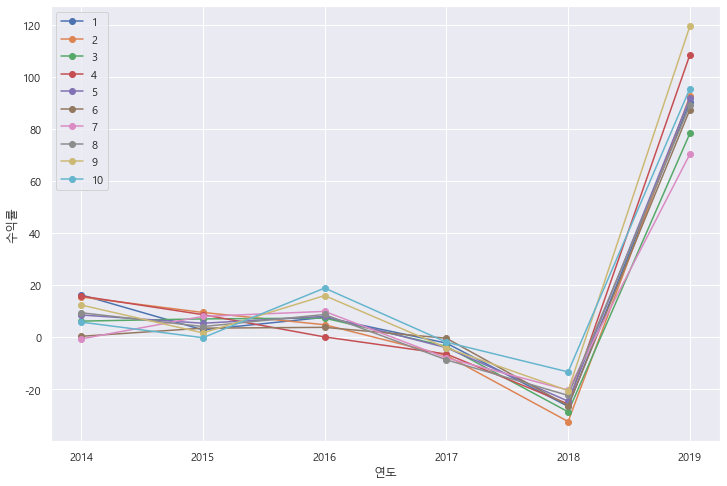

In [26]:
plt.figure(figsize = (12, 8))
for group in range(1, 11):
    graph_data = result.loc[(result['그룹'] == group), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = group)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [27]:
display(result.groupby('그룹')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
1,6.0,14.69,39.77,-26.60,-1.01,5.22,14.10,90.34
2,6.0,13.80,42.10,-32.39,-4.05,7.14,13.94,92.51
3,6.0,11.09,35.66,-28.66,-1.11,6.60,7.24,78.25
4,6.0,16.81,47.09,-25.64,-4.83,4.38,14.01,108.44
5,6.0,14.18,40.03,-24.58,-1.69,6.67,8.40,91.83
6,6.0,11.37,38.93,-26.33,-0.22,1.90,3.70,87.37
7,6.0,9.87,31.61,-20.34,-6.14,3.65,9.43,70.30
8,6.0,13.36,39.02,-22.36,-5.50,6.40,9.22,89.03
9,6.0,20.80,50.04,-20.52,-2.66,7.00,15.07,119.44
